# Analysis of STAR-PU Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import os
%matplotlib inline

In [2]:
os.chdir("..")
current_working_dir = os.getcwd()
print(current_working_dir)
data = pd.read_csv(r'output/measures/measure_STARPU_antibiotics.csv')
data

c:\Users\m84300af\OneDrive - The University of Manchester\Documents\GitHub\amr-uom-brit


,practice,sex,age_cat,antibacterial_prescriptions,population,value,date
0,10,F,0-4,NaN,NaN,NaN,2021-03-01
1,10,F,15-24,NaN,NaN,NaN,2021-03-01
2,10,F,25-34,NaN,NaN,NaN,2021-03-01
3,10,F,35-44,NaN,NaN,NaN,2021-03-01
4,10,F,45-54,NaN,NaN,NaN,2021-03-01
...,...,...,...,...,...,...,...
4585,9,M,45-54,NaN,NaN,NaN,2021-10-01
4586,9,M,5-14,NaN,NaN,NaN,2021-10-01
4587,9,M,55-64,NaN,NaN,NaN,2021-10-01
4588,9,M,65-74,NaN,NaN,NaN,2021-10-01


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   practice                     4590 non-null   int64  
 1   sex                          4590 non-null   object 
 2   age_cat                      4590 non-null   object 
 3   antibacterial_prescriptions  2791 non-null   float64
 4   population                   2791 non-null   float64
 5   value                        2791 non-null   float64
 6   date                         4590 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 251.1+ KB


In [4]:
data.describe()

,practice,antibacterial_prescriptions,population,value
count,4590.000000,2791.000000,2791.000000,2791.000000
mean,24.454902,3.590828,2.866356,1.251791
std,9.465357,3.442863,1.898608,1.065348
min,4.000000,0.000000,1.000000,0.000000
25%,16.000000,1.000000,1.000000,0.250000
50%,24.000000,3.000000,2.000000,1.000000
75%,32.000000,5.000000,4.000000,2.000000
max,46.000000,20.000000,12.000000,6.000000


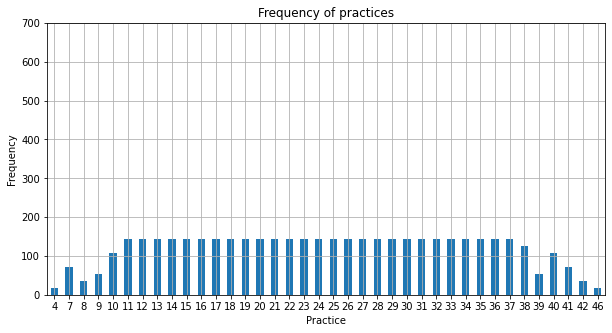

In [5]:
#data['practice'].value_counts().sort_index()

data['practice'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), rot=0)
plt.xlabel('Practice')
plt.ylabel('Frequency')
plt.title('Frequency of practices')
#plt.xlim(0, 100)
plt.ylim(0, 700)
plt.grid()
plt.savefig(r'output/practices.png', edgecolor='none')
plt.show()

F    2295
M    2295
Name: sex, dtype: int64


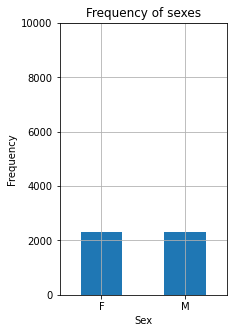

In [7]:
#data['sex'].value_counts().sort_index()

data['sex'].value_counts().sort_index().plot(kind='bar', figsize=(3, 5), rot=0)
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Frequency of sexes')
#plt.xlim(0, 100)
plt.ylim(0, 10000)
plt.grid()
print(data['sex'].value_counts().sort_index())
plt.savefig(r'output/sexes.png', edgecolor='none')
plt.show()

0-4      510
15-24    510
25-34    510
35-44    510
45-54    510
5-14     510
55-64    510
65-74    510
75+      510
Name: age_cat, dtype: int64


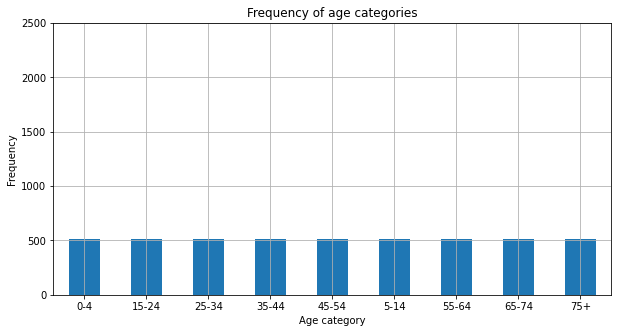

In [7]:
#data['age_cat'].value_counts().sort_index()

data['age_cat'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), rot=0)
plt.xlabel('Age category')
plt.ylabel('Frequency')
plt.title('Frequency of age categories')
#plt.xlim(0, 100)
plt.ylim(0, 2500)
plt.grid()
print(data['age_cat'].value_counts().sort_index())
plt.savefig(r'output/age_categories.png', edgecolor='none')
plt.show()

C:\Users\m84300af\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


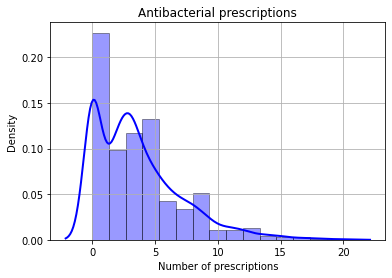

In [9]:
sns.distplot(data['antibacterial_prescriptions'], hist=True, kde=True, 
             bins=15, color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

plt.xlabel('Number of prescriptions')
#plt.ylabel('Frequency')
plt.title('Antibacterial prescriptions')
#plt.xlim(0, 100)
#plt.ylim(0, 1100)
plt.grid(True)
plt.savefig(r'output/antibacterial_prescirption.png', edgecolor='none')
plt.show()

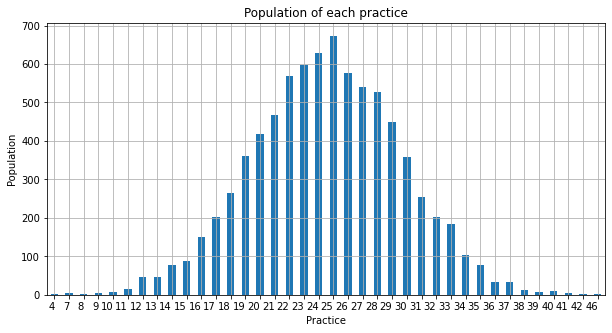

In [8]:
data.groupby(['practice'])['population'].sum().plot(kind='bar', figsize=(10, 5))
#plt.ylim(0.5, 2)
plt.xticks(rotation = 0, ha="right")
plt.title("Population of each practice")
plt.xlabel('Practice')
plt.ylabel('Population')
plt.grid()
plt.savefig(r'output/antibacterial_prescirption_grouped_population.png', edgecolor='none')
plt.show()

C:\Users\m84300af\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


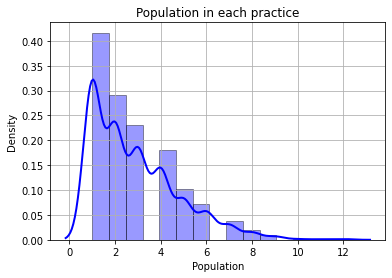

In [11]:
sns.distplot(data['population'], hist=True, kde=True, 
             bins=15, color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

plt.xlabel('Population')
#plt.ylabel('Frequency')
plt.title('Population in each practice')
#plt.xlim(0, 100)
#plt.ylim(0, 1100)
plt.grid(True)
plt.savefig(r'output/population.png', edgecolor='none')
plt.show()

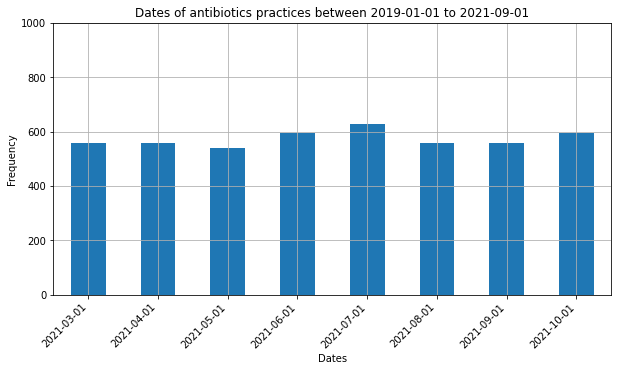

In [9]:
data['date'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
plt.ylim(0, 1000)
plt.xticks(rotation = 45, ha="right")
plt.title("Dates of antibiotics practices between 2019-01-01 to 2021-09-01")
plt.xlabel('Dates')
plt.ylabel('Frequency')
plt.grid()
plt.savefig(r'output/STARPU_barchart.png', edgecolor='none')
plt.show()

In [60]:
data.date.value_counts().sort_index()

2019-01-01    558
2019-02-01    540
2019-03-01    594
2019-04-01    576
2019-05-01    576
2019-06-01    558
2019-07-01    558
2019-08-01    522
2019-09-01    558
2019-10-01    576
2019-11-01    558
2019-12-01    522
2020-01-01    540
2020-02-01    522
2020-03-01    540
2020-04-01    558
2020-05-01    612
2020-06-01    540
2020-07-01    576
2020-08-01    558
2020-09-01    576
2020-10-01    522
2020-11-01    540
2020-12-01    576
2021-01-01    540
2021-02-01    540
2021-03-01    540
2021-04-01    486
2021-05-01    558
2021-06-01    576
2021-07-01    522
2021-08-01    576
2021-09-01    522
Name: date, dtype: int64

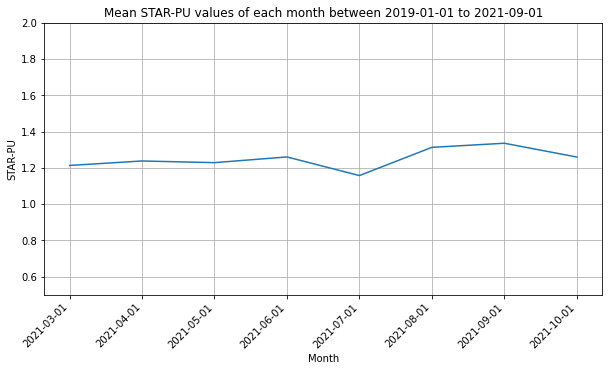

In [13]:
data.groupby(['date'])['value'].mean().plot(kind='line', figsize=(10, 5))
plt.ylim(0.5, 2)
plt.xticks(rotation = 45, ha="right")
plt.title("Mean STAR-PU values of each month between 2019-01-01 to 2021-09-01")
plt.xlabel('Month')
plt.ylabel('STAR-PU')
plt.grid()
#plt.xticks(values)
plt.savefig(r'output/STARPU_linechart.png', edgecolor='none')
plt.show()

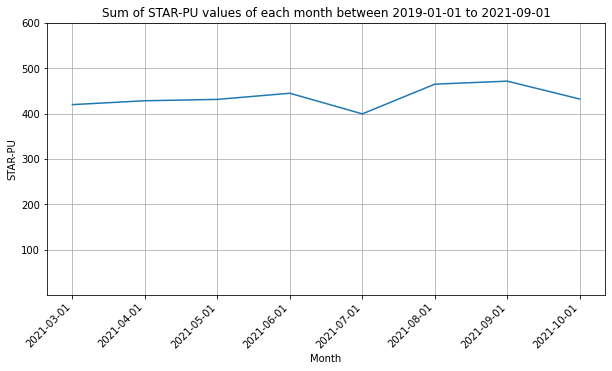

In [10]:
data.groupby(['date'])['value'].sum().plot(kind='line', figsize=(10, 5))
plt.ylim(0.5, 600)
plt.xticks(rotation = 45, ha="right")
plt.title("Sum of STAR-PU values of each month between 2019-01-01 to 2021-09-01")
plt.xlabel('Month')
plt.ylabel('STAR-PU')
plt.grid()
#plt.xticks(values)
plt.savefig(r'output/STARPU_sum_linechart.png', edgecolor='none')
plt.show()